In [69]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, VGG19
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve


In [2]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
path = r"C:\Users\dhyan\skin_dataset"

In [4]:
benign_folder = "C:\\Users\\dhyan\\skin_dataset\\benign_segmented"
malignant_folder = "C:\\Users\\dhyan\\skin_dataset\\malignant_segmented"

In [5]:
benign_images = [os.path.join(benign_folder, file) 
                 for file in os.listdir(benign_folder) 
                 if os.path.isfile(os.path.join(benign_folder, file))]
malignant_images = [os.path.join(malignant_folder, file) 
                    for file in os.listdir(malignant_folder) 
                    if os.path.isfile(os.path.join(malignant_folder, file))]

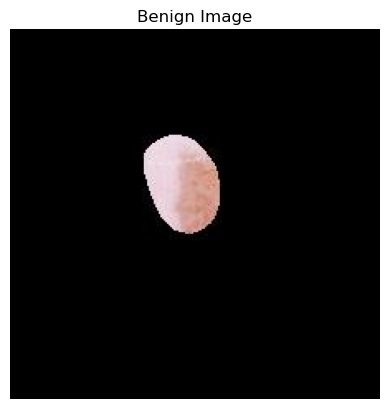

In [32]:
benign_image_path = benign_images[0]  
benign_image = cv2.imread(benign_image_path)
benign_image_rgb = cv2.cvtColor(benign_image, cv2.COLOR_BGR2RGB)
plt.imshow(benign_image_rgb)
plt.title('Benign Image')
plt.axis('off')  # Hide axes
plt.show()


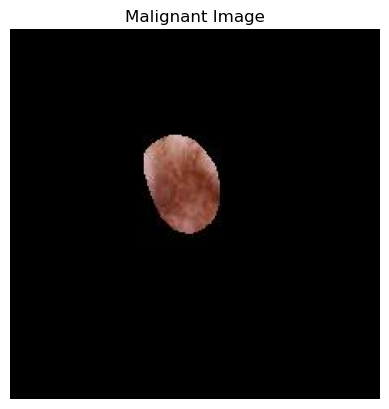

In [26]:
malignant_image_path = malignant_images[0]  
malignant_image = cv2.imread(malignant_image_path)
malignant_image_rgb = cv2.cvtColor(malignant_image, cv2.COLOR_BGR2RGB)  
plt.imshow(malignant_image_rgb)
plt.title('Malignant Image')
plt.axis('off')  # Hide axes
plt.show()

1.Data Preprocessing:
- Standardize image sizes and normalize pixel values.
- Apply augmentation techniques to increase data diversity.

In [7]:
target_size = (64, 64) 
batch_size = 32 

rotation_range = 40  
width_shift_range = 0.2  
height_shift_range = 0.2  
shear_range = 0.2  
zoom_range = 0.2 
horizontal_flip = True  
brightness_range = [0.8,1.2] 

In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    brightness_range=brightness_range,
    validation_split=0.2  
)


Model Architectures:-VGG19

In [9]:
input_shape = (224, 224, 3)

VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in VGG19_model.layers:
    layer.trainable = False

x = Flatten()(VGG19_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=VGG19_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,65

 Total params: 33,133,121 (126.39 MB)

 Trainable params: 13,108,737 (50.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [47]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 673s 10s/step - accuracy: 0.7652 - loss: 0.4838 - val_accuracy: 0.7841 - val_loss: 0.4616
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 627s 10s/step - accuracy: 0.7779 - loss: 0.4569 - val_accuracy: 0.7879 - val_loss: 0.4943
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 620s 9s/step - accuracy: 0.7846 - loss: 0.4577 - val_accuracy: 0.7765 - val_loss: 0.4514
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 84s 8s/step - accuracy: 0.7403 - loss: 0.5174
Test Loss: 0.5017536878585815
Test Accuracy: 0.7651515007019043


CNN MODEL

In [38]:
custom_model = Sequential()

In [39]:
custom_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

In [40]:
custom_model.add(Flatten())

custom_model.add(Dense(512, activation='relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(512, activation='relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(1, activation='sigmoid'))

In [41]:
custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
custom_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,526,465 (74.49 MB)

 Trainable params: 19,526,465 (74.49 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = custom_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.5468 - loss: 0.6846 - val_accuracy: 0.7765 - val_loss: 0.4926
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.7162 - loss: 0.5721 - val_accuracy: 0.7879 - val_loss: 0.4419
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7587 - loss: 0.5148 - val_accuracy: 0.7879 - val_loss: 0.4337
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.7634 - loss: 0.4984 - val_accuracy: 0.7614 - val_loss: 0.4587
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.7827 - loss: 0.4662 - val_accuracy: 0.7955 - val_loss: 0.4215
Restoring model weights from the end of the best epoch: 5.


In [48]:
test_loss, test_accuracy = custom_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 86s 441ms/step - accuracy: 0.7367 - loss: 0.4815
Test Loss: 0.4703685939311981
Test Accuracy: 0.7348484992980957


In [45]:
# Load and preprocess
X_benign, y_benign = load_and_preprocess_images(benign_images, label=0)
X_malignant, y_malignant = load_and_preprocess_images(malignant_images, label=1)

# Combine benign and malignant data
X = np.concatenate((X_benign, X_malignant), axis=0)
y = np.concatenate((y_benign, y_malignant), axis=0)

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2637, 224, 224, 3)
Shape of y: (2637,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [65]:
# Evaluate VGG model
y_pred_vgg = (model.predict(X_test) > 0.5).astype("int32")
accuracy_vgg = accuracy_score(y_test, y_pred_vgg)
precision_vgg = precision_score(y_test, y_pred_vgg)
recall_vgg = recall_score(y_test, y_pred_vgg)
f1_score_vgg = f1_score(y_test, y_pred_vgg)
conf_matrix_vgg = confusion_matrix(y_test, y_pred_vgg)

# Evaluate custom CNN model
y_pred_custom = (custom_model.predict(X_test) > 0.5).astype("int32")
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_score_custom = f1_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# Print evaluation metrics
print("VGG Model:")
print("Accuracy:", accuracy_vgg)
print("Precision:", precision_vgg)
print("Recall:", recall_vgg)
print("F1 Score:", f1_score_vgg)
print("Confusion Matrix:")
print(conf_matrix_vgg)

print("\nCustom CNN Model:")
print("Accuracy:", accuracy_custom)
print("Precision:", precision_custom)
print("Recall:", recall_custom)
print("F1 Score:", f1_score_custom)
print("Confusion Matrix:")
print(conf_matrix_custom)

9/9 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step
VGG Model:
Accuracy: 0.7651515151515151
Precision: 0.7130434782608696
Recall: 0.7387387387387387
F1 Score: 0.7256637168141593
Confusion Matrix:
[[120  33]
 [ 29  82]]

Custom CNN Model:
Accuracy: 0.7348484848484849
Precision: 0.6257668711656442
Recall: 0.918918918918919
F1 Score: 0.7445255474452556
Confusion Matrix:
[[ 92  61]
 [  9 102]]


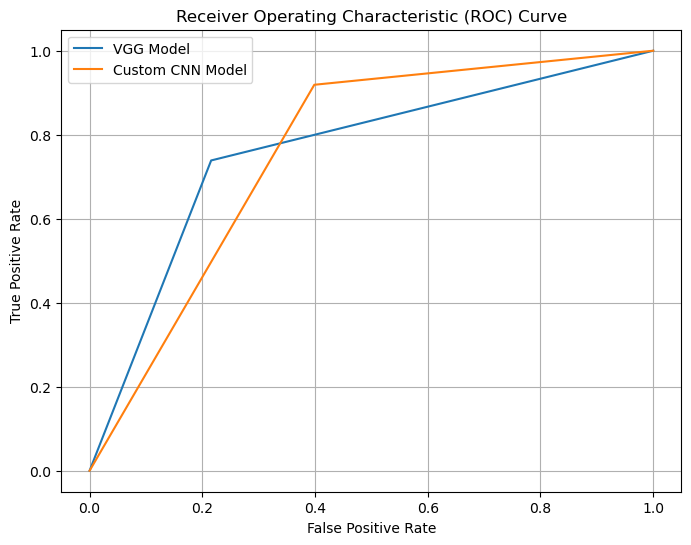

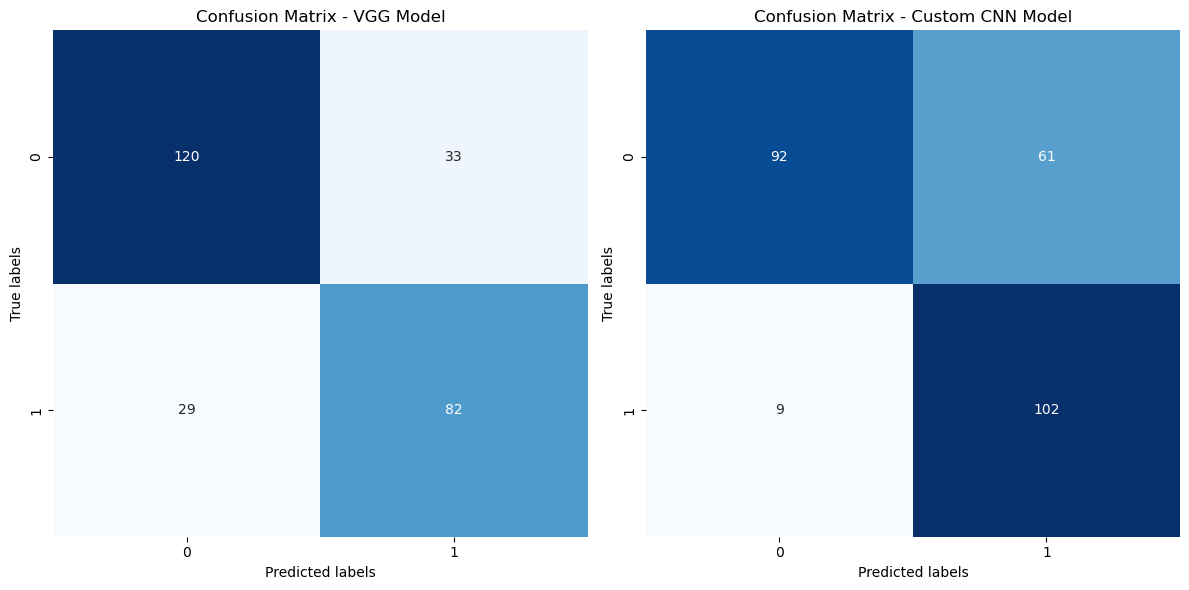

In [70]:
fpr_vgg, tpr_vgg, _ = roc_curve(y_test, y_pred_vgg)

# Compute ROC curve for custom CNN model
fpr_custom, tpr_custom, _ = roc_curve(y_test, y_pred_custom)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_vgg, tpr_vgg, label='VGG Model')
plt.plot(fpr_custom, tpr_custom, label='Custom CNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Compute confusion matrix for both models
cm_vgg = confusion_matrix(y_test, y_pred_vgg)
cm_custom = confusion_matrix(y_test, y_pred_custom)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix - VGG Model')
sns.heatmap(cm_vgg, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
plt.title('Confusion Matrix - Custom CNN Model')
sns.heatmap(cm_custom, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.show()